In [482]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [483]:
import pandas as pd

def encode_categorical_columns(df, cat_cols):
    '''
    Encode categorical columns in pandas dataframe using one-hot encoding.
    
    Parameters:
    df (pandas dataframe): The dataframe to encode.
    cat_cols (list): A list of column names to encode.
    
    Returns:
    A new pandas dataframe with the specified categorical columns replaced by their encoded values.
    '''
    # check if specified columns exist in the dataframe
    missing_cols = set(cat_cols) - set(df.columns)
    if missing_cols:
        raise KeyError(f"The following columns were not found in the dataframe: {list(missing_cols)}")
    
    # create a new dataframe with the encoded columns
    for col in cat_cols:
        df_encoded = pd.get_dummies(df[col], prefix=col)
        df = df.drop(col, axis=1)
        df = df.join(df_encoded)
    
    return df

In [484]:
categorical_columns = ['property_type', 'community']

In [485]:
data = pd.read_csv('./data/clean_housing_data.csv', on_bad_lines='skip')
data = data.drop(data.columns[0], axis=1)

data.info()
# why is the first row 15 non nulls compared to the rest?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           15 non-null     int64 
 1   gross_tax       15 non-null     int64 
 2   bedrooms        15 non-null     int64 
 3   bathrooms       15 non-null     int64 
 4   property_type   15 non-null     object
 5   community       15 non-null     object
 6   property_views  15 non-null     int64 
 7   lot_size        15 non-null     int64 
 8   year_built      15 non-null     int64 
 9   lot_width       15 non-null     int64 
 10  lot_length      15 non-null     int64 
 11  age             15 non-null     int64 
 12  bungalow        15 non-null     int64 
 13  storey          15 non-null     int64 
 14  basement        15 non-null     int64 
 15  laneway_house   15 non-null     int64 
 16  garage          15 non-null     int64 
 17  split_entry     15 non-null     int64 
dtypes: int64(16)

In [486]:
data.head()

,price,gross_tax,bedrooms,bathrooms,property_type,community,property_views,lot_size,year_built,lot_width,lot_length,age,bungalow,storey,basement,laneway_house,garage,split_entry
0,5498800,19041,3,4,house,arbutus,1491,6954,1987,57,57,36,0,2,1,0,1,0
1,4360000,15988,7,5,house,arbutus,601,6100,1989,50,50,34,0,3,0,0,1,0
2,6880000,23147,5,8,house,arbutus,540,6104,2017,50,50,6,0,2,1,0,0,0
3,5888000,12189,3,4,house,arbutus,284,4100,1933,44,44,90,0,3,0,0,0,0
4,4299000,14265,7,6,house,arbutus,1440,7320,1994,60,60,29,0,2,1,0,1,0


In [487]:
from sklearn.model_selection import train_test_split

X = data.drop(['price'], axis=1)
y = data['price']


In [488]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
train_data = X_train.join(y_train)


array([[<AxesSubplot:title={'center':'gross_tax'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'property_views'}>],
       [<AxesSubplot:title={'center':'lot_size'}>,
        <AxesSubplot:title={'center':'year_built'}>,
        <AxesSubplot:title={'center':'lot_width'}>,
        <AxesSubplot:title={'center':'lot_length'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bungalow'}>,
        <AxesSubplot:title={'center':'storey'}>,
        <AxesSubplot:title={'center':'basement'}>],
       [<AxesSubplot:title={'center':'laneway_house'}>,
        <AxesSubplot:title={'center':'garage'}>,
        <AxesSubplot:title={'center':'split_entry'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

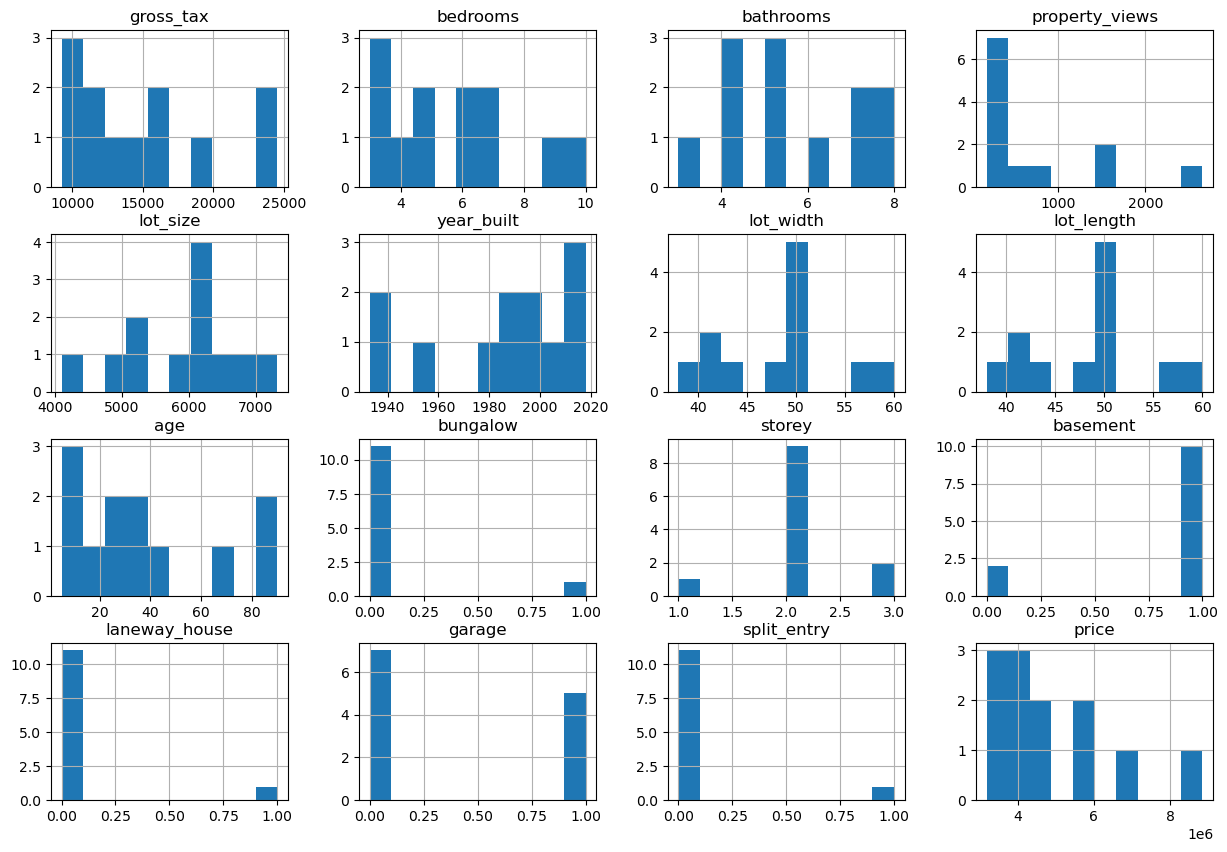

In [489]:
train_data.hist(figsize=(15,10))

In [490]:
# UN-skew data 

In [491]:
# Apply One Hot Encoding to Categorical Columns
train_data = encode_categorical_columns(train_data, categorical_columns)

<AxesSubplot:>

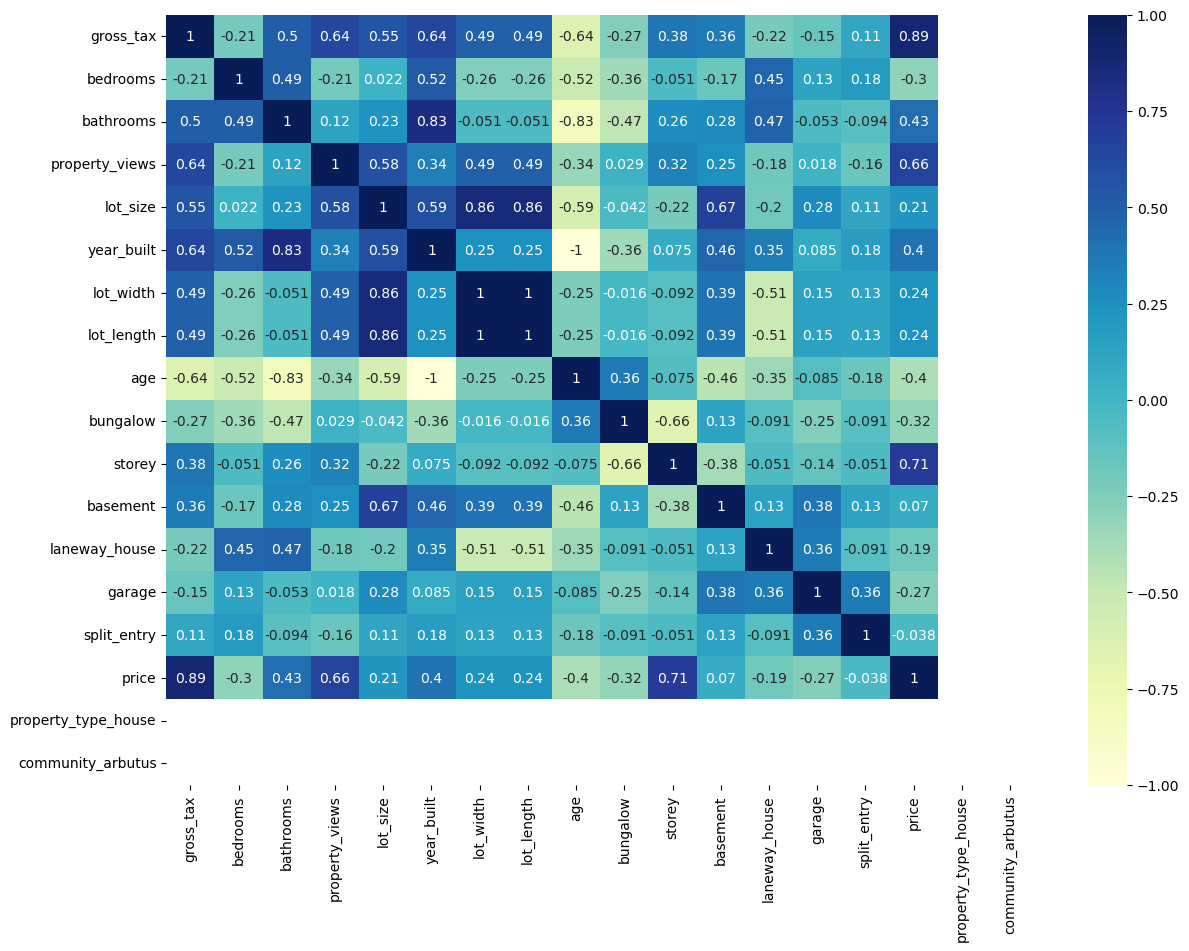

In [492]:
plt.figure(figsize=(14, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# split between cities ... 
# demographic
# how each attribute in each city differs
# garage
# 

In [493]:
# convert categoricals with the test_data as well
test_data = X_test.join(y_test)

test_data = encode_categorical_columns(test_data, categorical_columns)
test_data.head()

,gross_tax,bedrooms,bathrooms,property_views,lot_size,year_built,lot_width,lot_length,age,bungalow,storey,basement,laneway_house,garage,split_entry,price,property_type_house,community_arbutus
6,7074,5,2,707,3363,1930,57,57,93,0,2,0,0,1,0,2365000,1,1
10,23411,9,10,317,8500,2020,45,45,3,0,2,1,0,0,0,6800000,1,1
1,15988,7,5,601,6100,1989,50,50,34,0,3,0,0,1,0,4360000,1,1


In [494]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [495]:

X_test, y_test = test_data.drop(['price'], axis=1), test_data['price']
X_train, y_train = train_data.drop(['price'], axis=1), train_data['price']

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [496]:

reg = LinearRegression()

reg.fit(X_train, y_train)
reg.score(X_test, y_test)

-8.117274500540756

In [497]:
reg.fit(X_train_s, y_train)
reg.score(X_test_s, y_test)

-1.158684437522505

In [498]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train_s, y_train)


RandomForestClassifier()

In [499]:
forest.score(X_test_s, y_test)


0.0

In [503]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier()

param_grid = {
    "n_estimators": [3, 10, 30, 100, 200, 300],
    "max_features": [2, 4, 6, 8],
    "max_depth": [None, 4, 8]
}

# grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search = GridSearchCV(forest, param_grid, cv=2, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 4, 8],
                         'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30, 100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [504]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestClassifier(max_depth=8, max_features=8, n_estimators=10)

In [505]:
best_forest.score(X_test_s, y_test)

0.0